https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
train a classifier using each of the following:
1. Decision Tree
2. Ensemble of trees
3. Random forest
4. MLP Neural Network
a. With 1 hidden layer
b. With 2 hidden layers
c. With 3 hidden layers
You may experiment with choosing the other hyper-parameters for these models, however, anything that makes the model converge and work is sufficient for this exercise.
Use cross-fold validation in order to evaluate the performance of each classifier on the dataset.
(2 marks) Split a small amount of data off from the main training set for validation. For each classifier, find which label is predicted with the highest confidence over the validation set and plot the image and its predicted class.

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report   
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Load and Visiualize Data

In [102]:
digits = datasets.load_digits()

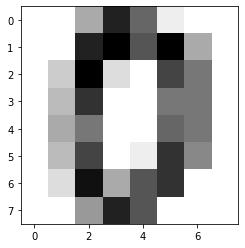

In [103]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap='binary')
plt.show()

## Reshape of Data

In [104]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### Shape of data

In [105]:
data = digits.images.reshape(digits.images.shape[0], -1)
data.shape

(1797, 64)

In [106]:
print("The dimension of train data is:", data.shape)
print("The dimension of test data is:", digits.target.shape)

The dimension of train data is: (1797, 64)
The dimension of test data is: (1797,)


# Prediction

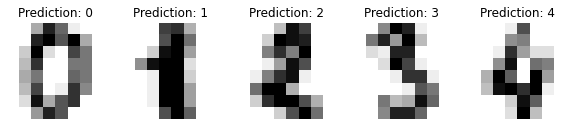

In [107]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Prediction: %i" % label)

# Part 1

# Model 1: Decision Tree Classifier

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split data into 70% train and 30% test subsets

In [109]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, shuffle=False, random_state = 42)

In [110]:
#Model

In [111]:
DTC = DecisionTreeClassifier(random_state = 42)
fit_model = DTC.fit(X_train, y_train)
predicted = DTC.predict(X_test)

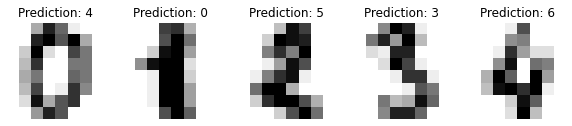

In [112]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, predicted):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Prediction: %i" % label)

# Classification report, confusion matrix, Plot

[[46  0  3  0  0  0  0  0  1  3]
 [ 0 38  0  5  3  0  1  2  1  3]
 [ 2  2 35  5  0  0  3  0  5  1]
 [ 0  1  4 37  1  4  0  1  2  3]
 [ 2  0  1  0 47  0  2  4  0  1]
 [ 2  0  1  2  0 47  4  0  0  0]
 [ 0  1  0  0  4  0 43  0  0  6]
 [ 0  0  0  0  2  1  0 50  0  1]
 [ 0  5  2  3  3  3  0  1 32  3]
 [ 1  1  0  1  1  3  0  0  1 47]]


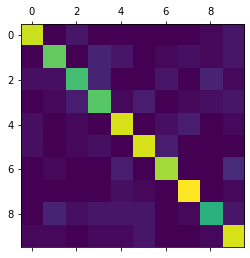

In [113]:
confusion_matrix = confusion_matrix(y_test, predicted)

print(confusion_matrix)

plt.matshow(confusion_matrix)

plt.show()

In [114]:
print(classification_report(y_test, predicted))

print("Accuracy", metrics.accuracy_score(y_test, predicted))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        53
           1       0.79      0.72      0.75        53
           2       0.76      0.66      0.71        53
           3       0.70      0.70      0.70        53
           4       0.77      0.82      0.80        57
           5       0.81      0.84      0.82        56
           6       0.81      0.80      0.80        54
           7       0.86      0.93      0.89        54
           8       0.76      0.62      0.68        52
           9       0.69      0.85      0.76        55

    accuracy                           0.78       540
   macro avg       0.78      0.78      0.78       540
weighted avg       0.78      0.78      0.78       540

Accuracy 0.7814814814814814


# Using GridsearchCV to get the Optimum value

In [115]:
p_gridDTC = {'min_samples_split' : range(10,500,20),
                'max_depth': range(1,20,2),
                 'criterion' : ['gini', 'entropy']}
grid_DTC = GridSearchCV(DTC, param_grid = p_gridDTC, refit=True,verbose=2,n_jobs=-1)

p_gridDTC_fit = grid_DTC.fit(X_train, y_train)

print("Optimum value of Max depth and min sample split for Decision Tree: ", grid_DTC.best_params_)

scores_trainDTC = grid_DTC.cv_results_['mean_test_score'];

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Optimum value of Max depth and min sample split for Decision Tree:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 10}


# Using best parameter to get the testing dataset with tuning

In [116]:
clf_DTC = DecisionTreeClassifier(criterion ='gini', max_depth = 15,min_samples_split = 10, random_state = 42)

clf3 = clf_DTC.fit(X_train,y_train)

yDTC_test_hat=clf3.predict(X_test) 

testDTC_accuracy=accuracy_score(y_test, yDTC_test_hat)*100

In [117]:
print("Accuracy of DTC for our testing dataset with tuning is : {:.2f}%".format(testDTC_accuracy))

Accuracy of DTC for our testing dataset with tuning is : 77.04%


# Cross Validate to evaluate the performance

In [118]:
from sklearn import metrics

DTC2 = DecisionTreeClassifier()

DTC_score = cross_val_score(clf_DTC, data, digits.target, cv=5)

In [119]:
print("The test accuracy is: ",DTC_score)

The test accuracy is:  [0.74166667 0.675      0.80501393 0.83286908 0.78272981]


# Accuracy with standard deviation and mean

In [120]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (DTC_score.mean(), DTC_score.std()))

0.77 accuracy with a standard deviation of 0.06


In [227]:
clf_DTC.fit(X_train, y_train)
y_preds_DTC = clf_DTC.predict(X_test)

print(y_preds[:15])
print(y_test[:15])

print('Test Accuracy : %.3f'%(y_preds == y_test).mean() )
print('Test Accuracy : %.3f'%clf_DTC.score(X_test, y_test))
print('Training Accuracy : %.3f'%clf_DTC.score(X_train, y_train));

[4 0 5 3 6 9 6 1 7 5 4 4 7 2 8]
[4 0 5 3 6 9 6 1 7 5 4 4 7 2 8]
Test Accuracy : 0.926
Test Accuracy : 0.770
Training Accuracy : 0.945


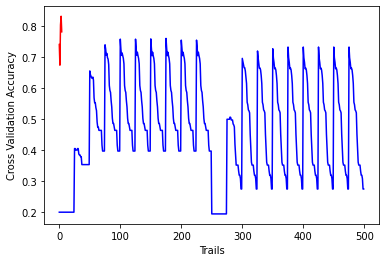

In [122]:
plt.figure(3)
plt.plot(scores_trainDTC,color='b')
plt.plot(DTC_score, color='r')
plt.xlabel('Trails')
plt.ylabel('Cross Validation Accuracy')
plt.show()

# Part 2
# Model 2: Ensemble of Trees: 
## Use Bagging Classifier as a method estimator

In [123]:
#Model
bag_model = BaggingClassifier(random_state=1, n_jobs=-1)
fit_bag_model = bag_model.fit(X_train, y_train)
predicted_bag = bag_model.predict(X_test)


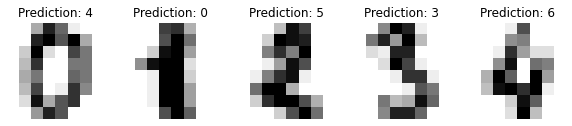

In [124]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, predicted_bag):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Prediction: %i" % label)

# Classification report, confusion matrix, Plot

[[51  0  0  0  0  0  0  0  2  0]
 [ 0 44  0  3  1  0  0  1  0  4]
 [ 2  1 40  6  0  0  0  2  1  1]
 [ 0  1  4 38  0  2  0  2  6  0]
 [ 2  0  0  0 50  1  2  2  0  0]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  1  0  0 53  0  0]
 [ 1  6  0  0  1  1  0  1 41  1]
 [ 2  0  0  2  0  1  0  1  1 48]]


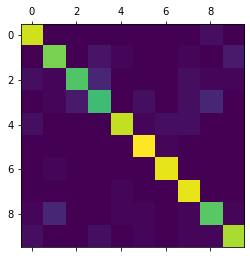

In [128]:
import numpy as np
from sklearn.metrics import confusion_matrix

confusion_matrix_bag = confusion_matrix(y_test, predicted_bag)

print(confusion_matrix_bag)

plt.matshow(confusion_matrix_bag)

plt.show()

In [129]:
print(classification_report(y_test, predicted_bag))

print("Accuracy", metrics.accuracy_score(y_test, predicted_bag))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        53
           1       0.83      0.83      0.83        53
           2       0.91      0.75      0.82        53
           3       0.78      0.72      0.75        53
           4       0.94      0.88      0.91        57
           5       0.92      0.98      0.95        56
           6       0.95      0.98      0.96        54
           7       0.85      0.98      0.91        54
           8       0.80      0.79      0.80        52
           9       0.89      0.87      0.88        55

    accuracy                           0.88       540
   macro avg       0.87      0.87      0.87       540
weighted avg       0.88      0.88      0.87       540

Accuracy 0.8759259259259259


In [130]:
n_samples = data.shape[0]
n_features = data.shape[1]


params = {'base_estimator': [None, KNeighborsClassifier(), DecisionTreeClassifier()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5, 1.0, n_samples//2,],
          'max_features': [0.5, 1.0, n_features//2,],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_classifier_grid = GridSearchCV(bag_model, param_grid =params, cv = 3, n_jobs=-1, verbose=2)

bagging_classifier_grid.fit(X_train, y_train);

scores_trainbag = bagging_classifier_grid.cv_results_['mean_test_score']

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [131]:
bagging_classifier_grid.best_params_

{'base_estimator': KNeighborsClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 0.5,
 'max_samples': 1.0,
 'n_estimators': 100}

# Cross Validation to get the nested score

In [132]:
bag_model2 = BaggingClassifier(KNeighborsClassifier(), bootstrap = True, 
                             bootstrap_features = False, max_features = 0.5,max_samples = 1.0, n_estimators = 100)
bag_score = cross_val_score(bag_model2, data, digits.target, cv = 5, n_jobs = -1)

In [133]:
print("The test accuracy is: ",bag_score)

The test accuracy is:  [0.94722222 0.95555556 0.97214485 0.98050139 0.95821727]


# Accuracy with sd and mean

In [134]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (bag_score.mean(), bag_score.std()))

0.96 accuracy with a standard deviation of 0.01


In [135]:
# Training and Testing Accuracy

In [226]:
bag_model2.fit(X_train, y_train)
y_preds_bag = bag_model2.predict(X_test)

print(y_preds[:15])
print(y_test[:15])

print('Test Accuracy : %.3f'%(y_preds == y_test).mean() )
print('Test Accuracy : %.3f'%bag_model2.score(X_test, y_test))
print('Training Accuracy : %.3f'%bag_model2.score(X_train, y_train));

[4 0 5 3 6 9 6 1 7 5 4 4 7 2 8]
[4 0 5 3 6 9 6 1 7 5 4 4 7 2 8]
Test Accuracy : 0.926
Test Accuracy : 0.963
Training Accuracy : 0.995


# Model: 3 Random Forest

In [137]:
#Model
rf_model = RandomForestClassifier(random_state = 12)
fit_rf_model = rf_model.fit(X_train, y_train)
predicted_rf = rf_model.predict(X_test)


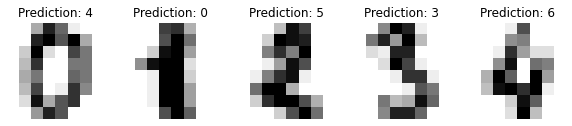

In [138]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, predicted_rf):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Prediction: %i" % label)

# Classification report, confusion matrix, Plot

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 44  0  1  0  1  0  0  0  7]
 [ 1  1 47  3  0  0  0  0  0  1]
 [ 0  1  0 43  0  2  0  2  5  0]
 [ 0  0  0  0 54  0  0  2  0  1]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 53  1  0]
 [ 0  2  0  0  1  1  0  1 46  1]
 [ 0  0  0  1  0  1  0  1  0 52]]


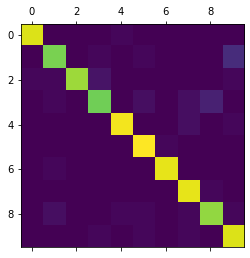

In [139]:
import numpy as np

confusion_matrix_rf = confusion_matrix(y_test, predicted_rf)

print(confusion_matrix_rf)

plt.matshow(confusion_matrix_rf)

plt.show()

In [140]:
print(classification_report(y_test, predicted_bag))

print("Accuracy", metrics.accuracy_score(y_test, predicted_rf))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        53
           1       0.83      0.83      0.83        53
           2       0.91      0.75      0.82        53
           3       0.78      0.72      0.75        53
           4       0.94      0.88      0.91        57
           5       0.92      0.98      0.95        56
           6       0.95      0.98      0.96        54
           7       0.85      0.98      0.91        54
           8       0.80      0.79      0.80        52
           9       0.89      0.87      0.88        55

    accuracy                           0.88       540
   macro avg       0.87      0.87      0.87       540
weighted avg       0.88      0.88      0.87       540

Accuracy 0.924074074074074


# Define Classifier
# Using GridsearchCV

In [141]:
param_rf = {"n_estimators": [10,50,100],
              "max_depth": [3, None],
              "max_features": ["sqrt"],
              "min_samples_split": [2,11],
              "min_samples_leaf": [1,11],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

rf_classifier_grid = GridSearchCV(rf_model, param_grid = param_rf, cv = 5, n_jobs=-1, verbose=2)

rf_classifier_grid.fit(X_train, y_train)

scores_trainrf = rf_classifier_grid.cv_results_['mean_test_score'];

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [142]:
print("BAG scores:",scores_trainrf)

BAG scores: [0.76368494 0.82018592 0.82256055 0.76211345 0.82257636 0.82415101
 0.75575476 0.81700816 0.81698919 0.75575476 0.81700816 0.81698919
 0.87113135 0.91408019 0.92284513 0.88306141 0.91012142 0.91567381
 0.85524885 0.89420414 0.89658825 0.85524885 0.89420414 0.89658825
 0.73904382 0.81227155 0.81701132 0.73904382 0.81227155 0.81701132
 0.7398438  0.8114779  0.81621451 0.7398438  0.8114779  0.81621451
 0.88863909 0.9188832  0.92126731 0.89421678 0.91410864 0.91967369
 0.85759818 0.89817871 0.89259154 0.85759818 0.89817871 0.89259154
 0.73508822 0.81703029 0.81462721 0.73508822 0.81464934 0.81542086
 0.73508822 0.8154335  0.81462721 0.73508822 0.8154335  0.81462721
 0.89420097 0.92523557 0.93081009 0.88782963 0.91805793 0.92204199
 0.87032821 0.8957946  0.89499779 0.87032821 0.8957946  0.89499779
 0.74225005 0.82103649 0.81383672 0.74225005 0.82103649 0.81383672
 0.74225005 0.82023651 0.8130399  0.74225005 0.82023651 0.8130399
 0.88783912 0.92285145 0.92762284 0.88069626 0.9125

# Best Parameter

In [143]:
rf_classifier_grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

# Model with best Parameter
# Using Cross Validation to evaluate the performance

In [144]:
rf_model2 = RandomForestClassifier(bootstrap = False, 
                             criterion = "gini", max_depth = None, max_features = "sqrt", min_samples_leaf = 1,
                                  min_samples_split = 2, n_estimators = 100)

rf_score = cross_val_score(rf_model2, data, digits.target, cv = 5, n_jobs = -1)



In [145]:
print("The test accuracy is: ",rf_score)

The test accuracy is:  [0.94444444 0.91666667 0.95264624 0.96657382 0.94150418]


## Accuracy with sd and mean

In [146]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (bag_score.mean(), bag_score.std()))

0.96 accuracy with a standard deviation of 0.01


## Training and Testing score

In [228]:
rf_model2.fit(X_train, y_train)
y_preds_rf = rf_model2.predict(X_test)

print(y_preds[:15])
print(y_test[:15])

print('Test Accuracy : %.3f'%(y_preds == y_test).mean() )
print('Test Accuracy : %.3f'%rf_model2.score(X_test, y_test))
print('Training Accuracy : %.3f'%rf_model2.score(X_train, y_train))

[4 0 5 3 6 9 6 1 7 5 4 4 7 2 8]
[4 0 5 3 6 9 6 1 7 5 4 4 7 2 8]
Test Accuracy : 0.926
Test Accuracy : 0.928
Training Accuracy : 1.000


# Model: 4 MLP Neural Network
- with 1 hidden layer
- with 2 hidden layers
- with 3 hidden layers

In [148]:
mlp_model = MLPClassifier(random_state = 12)
fit_mlp_model = mlp_model.fit(X_train, y_train)
predicted_mlp = mlp_model.predict(X_test)

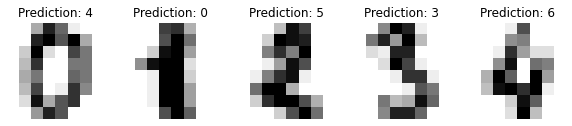

In [149]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, predicted_mlp):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Prediction: %i" % label)

# Classification report, confusion matrix, Plot

[[50  0  0  0  1  0  2  0  0  0]
 [ 1 47  0  2  0  1  0  0  0  2]
 [ 0  0 51  2  0  0  0  0  0  0]
 [ 0  0  0 44  0  3  0  0  6  0]
 [ 1  0  0  0 53  0  0  0  0  3]
 [ 0  1  0  0  0 54  1  0  0  0]
 [ 0  0  0  0  0  0 53  0  1  0]
 [ 0  0  0  0  0  0  0 53  1  0]
 [ 0  1  0  0  2  2  0  0 47  0]
 [ 0  0  0  0  0  2  0  2  1 50]]


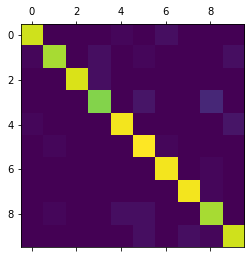

In [150]:
import numpy as np

confusion_matrix_mlp = confusion_matrix(y_test, predicted_mlp)

print(confusion_matrix_mlp)

plt.matshow(confusion_matrix_mlp)

plt.show()

In [151]:
print(classification_report(y_test, predicted_mlp))

print("Accuracy", metrics.accuracy_score(y_test, predicted_mlp))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.96      0.89      0.92        53
           2       1.00      0.96      0.98        53
           3       0.92      0.83      0.87        53
           4       0.95      0.93      0.94        57
           5       0.87      0.96      0.92        56
           6       0.95      0.98      0.96        54
           7       0.96      0.98      0.97        54
           8       0.84      0.90      0.87        52
           9       0.91      0.91      0.91        55

    accuracy                           0.93       540
   macro avg       0.93      0.93      0.93       540
weighted avg       0.93      0.93      0.93       540

Accuracy 0.9296296296296296


# Define classifier

In [ ]:
param_mlp = {'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
             'max_iter': [50, 100, 150],
             'activation': ['tanh', 'relu', 'sigmoid'],
             'solver': ['sgd', 'adam'],
             'alpha': [0.0001, 0.05],
             'learning_rate': ['constant','adaptive', 'invscaling']}

mlp_classifier_grid = GridSearchCV(mlp_model, param_grid = param_mlp, cv = 5, n_jobs= -1,verbose=2)

mlp_classifier_grid.fit(X_train, y_train);

scores_trainmlp = mlp_classifier_grid.cv_results_['mean_test_score'];

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
print("MLP scores:",scores_trainmlp)

# Best Parameter

In [ ]:
mlp_classifier_grid.best_params_

# Using Cross Validation to evaluate the performance

In [ ]:
mlp_model2 = MLPClassifier(activation = 'relu', 
                           alpha = 0.05, 
                           hidden_layer_sizes = (150, 100, 50), 
                           learning_rate = 'constant',   
                           max_iter = 100, 
                           solver = 'adam')

mlp_score = cross_val_score(mlp_model2, data, digits.target, cv = 5, n_jobs = -1)

In [156]:
print("The test accuracy is: ",mlp_score)

The test accuracy is:  [0.97222222 0.90555556 0.9637883  0.97771588 0.93871866]


# Accuracy with mean and sd

In [157]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (mlp_score.mean(), mlp_score.std()))

0.95 accuracy with a standard deviation of 0.03


In [229]:
mlp_model2.fit(X_train, y_train)
y_preds_mlp = mlp_model2.predict(X_test)

print(y_preds[:15])
print(y_test[:15])

print('Test Accuracy : %.3f'%(y_preds == y_test).mean() )
print('Test Accuracy : %.3f'%mlp_model2.score(X_test, y_test))
print('Training Accuracy : %.3f'%mlp_model2.score(X_train, y_train))

[4 0 5 3 6 9 6 1 7 5 4 4 7 2 8]
[4 0 5 3 6 9 6 1 7 5 4 4 7 2 8]
Test Accuracy : 0.926
Test Accuracy : 0.931
Training Accuracy : 1.000


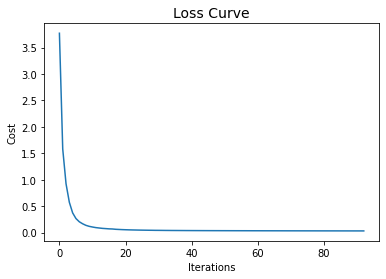

In [159]:
plt.plot(mlp_model2.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# MLP matshow

In [161]:
from sklearn.exceptions import ConvergenceWarning
import warnings

Training set score: 1.000000
Test set score: 0.938889


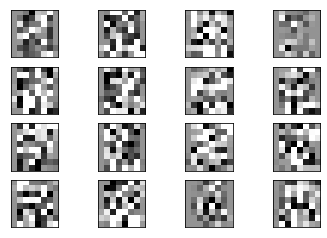

In [162]:
mlp_model2 = MLPClassifier(activation = 'relu', 
                           alpha = 0.05, 
                           hidden_layer_sizes = (150, 100, 50), 
                           learning_rate = 'constant',   
                           max_iter = 100, 
                           solver = 'adam')

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp_model2.fit(X_train, y_train)

print("Training set score: %f" % mlp_model2.score(X_train, y_train))
print("Test set score: %f" % mlp_model2.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp_model2.coefs_[0].min(), mlp_model2.coefs_[0].max()
for coef, ax in zip(mlp_model2.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

# With the different iteration, acivation functions, learnining rate check for convergency of the model

In [193]:
classifier = MLPClassifier(
    hidden_layer_sizes=(500,),
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)
# fit the model on the training data
classifier.fit(X_train, y_train)

Iteration 1, loss = 19.17889329
Iteration 2, loss = 4.75063039
Iteration 3, loss = 9.71732011
Iteration 4, loss = 2.20745971
Iteration 5, loss = 6.06949054
Iteration 6, loss = 2.35546078
Iteration 7, loss = 2.34565675
Iteration 8, loss = 2.35071939
Iteration 9, loss = 2.33103515
Iteration 10, loss = 2.32305550
Iteration 11, loss = 2.32131421
Iteration 12, loss = 2.32113000
Iteration 13, loss = 2.32151272
Iteration 14, loss = 2.32109878
Iteration 15, loss = 2.32049819
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(500,), learning_rate_init=0.1, random_state=1,
              solver='sgd', verbose=10)

In [194]:
classifier2 = MLPClassifier(
    hidden_layer_sizes=(500,500,),
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.05,
)
# fit the model on the training data
classifier2.fit(X_train, y_train)

Iteration 1, loss = 11.83493097
Iteration 2, loss = 16.69729599
Iteration 3, loss = 4.34740154
Iteration 4, loss = 2.87288101
Iteration 5, loss = 2.34561877
Iteration 6, loss = 2.32708013
Iteration 7, loss = 2.32007129
Iteration 8, loss = 2.32089924
Iteration 9, loss = 2.31414694
Iteration 10, loss = 2.31228103
Iteration 11, loss = 2.27619877
Iteration 12, loss = 2.39830351
Iteration 13, loss = 2.31623874
Iteration 14, loss = 2.31408371
Iteration 15, loss = 2.31415023
Iteration 16, loss = 2.31415990
Iteration 17, loss = 2.31130363
Iteration 18, loss = 2.31328018
Iteration 19, loss = 2.31188316
Iteration 20, loss = 2.31257397
Iteration 21, loss = 2.31305679
Iteration 22, loss = 2.31194527
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(500, 500), learning_rate_init=0.05,
              random_state=1, solver='sgd', verbose=10)

In [195]:
classifier3 = MLPClassifier(
    hidden_layer_sizes=(500,500,500),
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.05,
)
# fit the model on the training data
classifier3.fit(X_train, y_train)

Iteration 1, loss = 9.85107800
Iteration 2, loss = 2.30978040
Iteration 3, loss = 8.04687019
Iteration 4, loss = 3.01102300
Iteration 5, loss = 2.18972636
Iteration 6, loss = 2.36383154
Iteration 7, loss = 2.31724509
Iteration 8, loss = 3.48884124
Iteration 9, loss = 2.30518116
Iteration 10, loss = 2.37105041
Iteration 11, loss = 2.31623347
Iteration 12, loss = 2.31331879
Iteration 13, loss = 2.30599302
Iteration 14, loss = 2.30628516
Iteration 15, loss = 2.31206687
Iteration 16, loss = 2.30994187
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(500, 500, 500), learning_rate_init=0.05,
              random_state=1, solver='sgd', verbose=10)

In [196]:
print("Training set score: %f" % classifier.score(X_train, y_train))
print("Test set score: %f" % classifier.score(X_test, y_test))

Training set score: 0.103421
Test set score: 0.098148


In [197]:
print("Training set score: %f" % classifier2.score(X_train, y_train))
print("Test set score: %f" % classifier2.score(X_test, y_test))

Training set score: 0.101034
Test set score: 0.100000


In [198]:
print("Training set score: %f" % classifier3.score(X_train, y_train))
print("Test set score: %f" % classifier3.score(X_test, y_test))

Training set score: 0.103421
Test set score: 0.098148


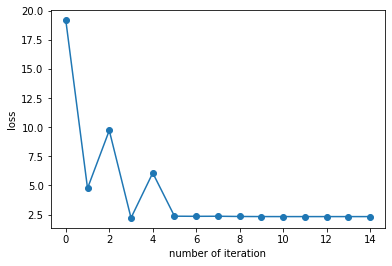

In [199]:
fig, axes = plt.subplots(1, 1)
axes.plot(classifier.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()

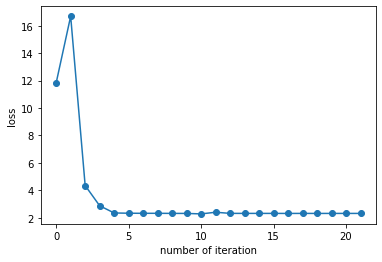

In [200]:
fig, axes = plt.subplots(1, 1)
axes.plot(classifier2.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()

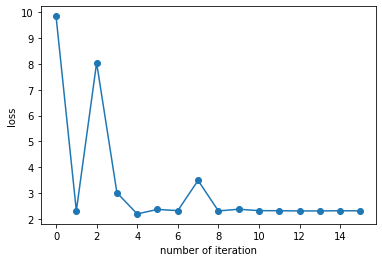

In [201]:
fig, axes = plt.subplots(1, 1)
axes.plot(classifier3.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()

# Part 2
Split a small amount of data off from the main training set for validation. For each classifier, find which label is predicted with the highest confidence over the validation set and plot the image and its predicted class.

In [206]:
from keras.models import Sequential
from keras.layers import Dense, Activation

mpl1 = Sequential()
mpl1.add(Dense(10, input_shape=(64,), activation="sigmoid"))

mpl1.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

mpl1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


In [207]:
history = mpl1.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
36/36 [==============================] - 1s 7ms/step - loss: 3.8975 - accuracy: 0.4253 - val_loss: 1.2426 - val_accuracy: 0.6825
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.8134 - val_loss: 0.4460 - val_accuracy: 0.8730
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 0.3472 - accuracy: 0.8966 - val_loss: 0.3990 - val_accuracy: 0.8889
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 0.2738 - accuracy: 0.9169 - val_loss: 0.2870 - val_accuracy: 0.9127
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9372 - val_loss: 0.3938 - val_accuracy: 0.8968
Epoch 6/50
36/36 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.9425 - val_loss: 0.2669 - val_accuracy: 0.8968
Epoch 7/50
36/36 [==============================] - 0s 2ms/step - loss: 0.1463 - accuracy: 0.9567 - val_loss: 0.2470 - val_accuracy: 0.9206
Epoch 8/50
36/36 [==

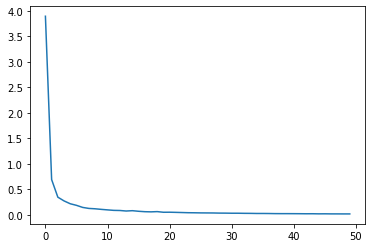

In [209]:
plt.plot(history.history['loss']);

In [210]:
loss, acc = mpl1.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test Accuracy:", acc)

17/17 [==============================] - 0s 4ms/step - loss: 0.3937 - accuracy: 0.9000
Test loss: 0.3936825692653656
Test Accuracy: 0.8999999761581421


In [211]:
# Two hidden layers

mpl2 = Sequential()
mpl2.add(Dense(128, input_shape=(64,), activation="relu"))
mpl2.add(Dense(10,activation="softmax"))

mpl2.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

mpl2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 9,610
Trainable params: 9,610
Non-trainable params: 0
_________________________________________________________________


In [212]:
history2 = mpl2.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
36/36 [==============================] - 1s 7ms/step - loss: 1.7833 - accuracy: 0.6569 - val_loss: 0.5193 - val_accuracy: 0.8413
Epoch 2/50
36/36 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.9187 - val_loss: 0.6964 - val_accuracy: 0.8254
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9443 - val_loss: 0.3316 - val_accuracy: 0.9127
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.9637 - val_loss: 0.2612 - val_accuracy: 0.9365
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.9717 - val_loss: 0.2573 - val_accuracy: 0.9286
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9805 - val_loss: 0.2944 - val_accuracy: 0.8968
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0642 - accuracy: 0.9832 - val_loss: 0.2153 - val_accuracy: 0.9365
Epoch 8/50
36/36 [==

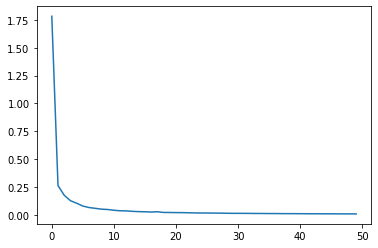

In [214]:
plt.plot(history2.history['loss']);

In [216]:
loss, acc = mpl2.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test Accuracy:", acc)

17/17 [==============================] - 0s 4ms/step - loss: 0.2953 - accuracy: 0.9167
Test loss: 0.2952825725078583
Test Accuracy: 0.9166666865348816


In [218]:
# Three hidden layers

mpl3 = Sequential()
mpl3.add(Dense(128, input_shape=(64,), activation="relu"))
mpl3.add(Dense(256, activation="relu"))
mpl3.add(Dense(10,activation="softmax"))

mpl3.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

mpl3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 43,914
Trainable params: 43,914
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
36/36 [==============================] - 1s 7ms/step - loss: 1.2821 - accuracy: 0.6799 - val_loss: 0.7583 - val_accuracy: 0.7381
Epoch 2/50
36/36 [==============================] - 0s 4ms/step - loss: 0.2437 - accuracy: 0.9425 - val_loss: 0.2366 - val_accuracy: 0.9286
Epoch 3/50
36/36 [==============================] - 0s 4ms/step - loss: 0.1599 - accuracy: 0.9576 - val_loss: 0.3047 - val_accuracy: 0.8889
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.9752 - val_loss: 0.1436 - val_accuracy: 0.9603
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0937 - accuracy: 0.9770 - val_loss: 0.1382 - val_accuracy: 0.9683
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0758 - accuracy: 0.9859 - val_loss: 0.1412 - val_accuracy: 0.9603
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9929 - val_loss: 0.1231 - val_accuracy: 0.9683
Epoch 8/50
36/36 [==

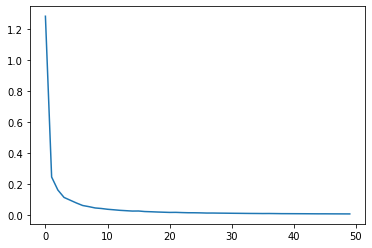

In [219]:
history3 = mpl3.fit(X_train, y_train, validation_split=0.1, epochs=50)
plt.plot(history3.history['loss'])

In [220]:
loss, acc = mpl3.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test Accuracy:", acc)

17/17 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.9278
Test loss: 0.2631639838218689
Test Accuracy: 0.9277777671813965


# Decision Tree

In [230]:
res = train_test_split(digits.data, digits.target, 
                       train_size=0.7,
                       test_size=0.3,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res 
accuracy_score(test_labels, y_preds_DTC)

0.1037037037037037

# Ensemble Tree

In [231]:
res = train_test_split(digits.data, digits.target, 
                       train_size=0.7,
                       test_size=0.3,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res 
accuracy_score(test_labels, y_preds_bag)

0.09074074074074075

# Random Forest

In [232]:
res = train_test_split(digits.data, digits.target, 
                       train_size=0.7,
                       test_size=0.3,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res 
accuracy_score(test_labels, y_preds_rf)

0.09444444444444444

# MLP Neural Network

In [233]:
res = train_test_split(digits.data, digits.target, 
                       train_size=0.7,
                       test_size=0.3,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res 
accuracy_score(test_labels, y_preds_mlp)

0.1